In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from typing import ClassVar
from sklearn.metrics import classification_report

In [6]:
# Reading the dataset
dataset = pd.read_csv("dataset_preprocessed.csv")
data_without_outliers = dataset.iloc[:, 1:]
dataset.head()
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26691 entries, 0 to 26690
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    26691 non-null  int64  
 1   age                            26691 non-null  float64
 2   bmi                            26691 non-null  float64
 3   elective_surgery               26691 non-null  bool   
 4   ethnicity                      26208 non-null  object 
 5   gender                         26676 non-null  object 
 6   height                         26691 non-null  float64
 7   icu_admit_source               26650 non-null  object 
 8   icu_id                         26691 non-null  int64  
 9   icu_stay_type                  26691 non-null  object 
 10  icu_type                       26691 non-null  object 
 11  pre_icu_los_days               26691 non-null  float64
 12  weight                         26691 non-null 

,hospital_id,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,gcs_eyes_apache,...,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
count,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,...,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000,26691.000000
mean,104.230227,62.398530,27.356705,169.107089,516.899592,0.617008,78.350213,167.113805,372.950473,3.385134,...,124.465778,108.305343,124.386291,108.310751,152.850908,109.620998,4.191731,3.921499,0.119690,0.068534
std,63.853047,17.347816,6.685827,10.358768,224.174222,2.082229,20.556119,82.516616,276.196976,1.019934,...,22.474549,21.906157,22.268121,21.737825,68.591596,33.050540,0.605076,0.541365,0.285905,0.258827
min,2.000000,16.000000,14.843986,137.200000,82.000000,-13.775000,38.600000,101.000000,0.140000,1.000000,...,75.000000,53.000000,75.000000,53.000000,73.000000,33.000000,2.800000,2.400000,-1.000000,-1.000000
25%,43.000000,53.000000,22.917766,162.500000,369.000000,0.026389,63.900000,113.000000,109.090000,3.000000,...,109.000000,94.000000,109.000000,94.000000,109.000000,90.000000,3.800000,3.600000,0.020000,0.010000
50%,103.000000,63.000000,26.643161,169.241881,508.000000,0.105556,77.000000,119.000000,312.030000,4.000000,...,124.000000,108.305343,124.386291,108.310751,138.000000,107.000000,4.191731,3.921499,0.070000,0.030000
75%,166.000000,76.000000,30.675521,177.800000,669.000000,0.277083,90.100000,301.000000,501.050000,4.000000,...,138.000000,122.000000,137.000000,122.000000,167.000000,122.000000,4.400000,4.200000,0.160000,0.070000
max,204.000000,89.000000,67.814990,195.590000,927.000000,84.367361,186.000000,308.000000,2201.050000,4.000000,...,223.000000,194.000000,223.000000,195.000000,611.000000,288.000000,7.000000,5.800000,0.990000,0.970000


In [7]:
# Separation into data and label

X = dataset.drop(["hospital_death","ethnicity","icu_admit_source","icu_stay_type","icu_type","apache_3j_bodysystem","apache_2_bodysystem"], axis=1)
X = pd.get_dummies(X)
y = dataset['hospital_death']

# Normalization:
X = preprocessing.normalize(X)

In [8]:
(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 1)
cv = StratifiedKFold(n_splits=10) 
gnb = GaussianNB()
cv_scores = cross_val_score(gnb,X=X,y=y,cv=cv)
print(np.mean(cv_scores)) 

0.8758043734204481


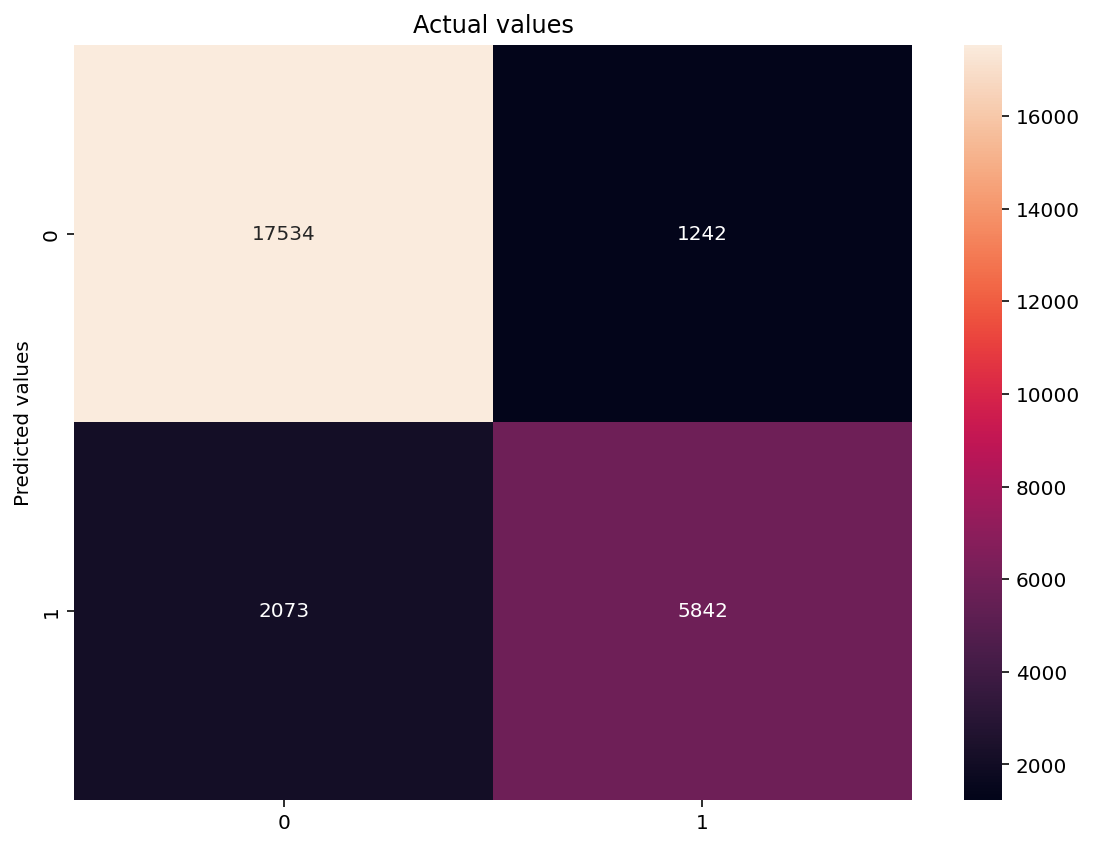

0.8758008317410363
              precision    recall  f1-score   support

       False       0.89      0.93      0.91     18776
        True       0.82      0.74      0.78      7915

    accuracy                           0.88     26691
   macro avg       0.86      0.84      0.85     26691
weighted avg       0.87      0.88      0.87     26691



In [9]:
prediction = cross_val_predict(gnb, X=X, y=y,  cv=cv)

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y,prediction),annot = True, fmt = ".0f")
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y, prediction))
print(classification_report(y, prediction))

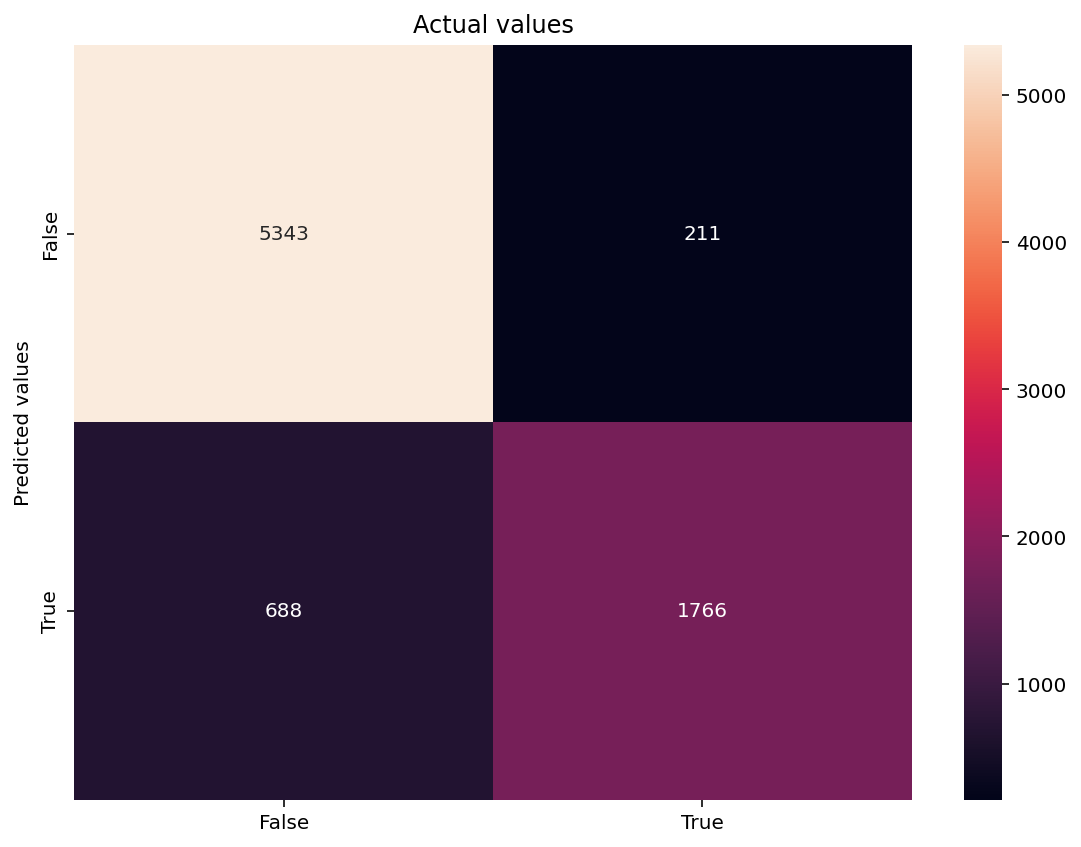

0.8877372627372627
              precision    recall  f1-score   support

       False       0.89      0.96      0.92      5554
        True       0.89      0.72      0.80      2454

    accuracy                           0.89      8008
   macro avg       0.89      0.84      0.86      8008
weighted avg       0.89      0.89      0.88      8008



In [10]:
clf = GaussianNB()
clf.fit(x_train, y_train)
prediction=clf.predict(x_test)

#Confusion matrix
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test,prediction),annot = True,  fmt = ".0f",xticklabels = clf.classes_,yticklabels = clf.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))